In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
from sklearn.metrics import classification_report

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df_amazon = pd.read_json('Movies_and_TV_5.json',lines=True)

In [3]:
df_amazon.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0005019281,"[0, 0]",4,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1203984000
1,0005019281,"[0, 0]",3,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1388361600
2,0005019281,"[0, 0]",3,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1388361600
3,0005019281,"[0, 0]",5,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1202860800
4,0005019281,"[0, 0]",4,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1387670400


In [46]:
df_amazon.dtypes

asin                      object
helpful                   object
overall                    int64
reviewText                object
reviewTime                object
reviewerID                object
reviewerName              object
summary                   object
unixReviewTime             int64
reviewTime_d      datetime64[ns]
perc_helpful             float64
num_votes                  int64
weekday                    int64
overall_5                   bool
dtype: object

In [5]:
df_amazon['timestamp'] = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [37]:
# look and see if year or day of week
df_amazon['weekday'] = df_amazon.reviewTime_d.apply(lambda x: x.weekday())

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
df_amazon['overall_5'] = (df_amazon['overall'] == 5) * 1.0

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_amazon[['weekday','overall_5']].groupby(['weekday']).agg([np.mean,np.std])

overall_5          
             mean       std
weekday                    
0        0.528072  0.499212
1        0.535192  0.498761
2        0.540567  0.498353
3        0.539347  0.498450
4        0.538139  0.498544
5        0.532107  0.498969
6        0.525545  0.499348

In [ ]:
# anova test

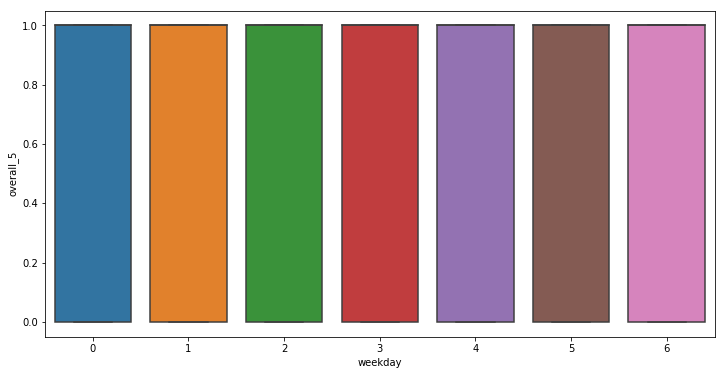

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday',y='overall_5', data=df_amazon)
plt.show()

In [6]:
df_amazon.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'reviewTime_d'],
      dtype='object')

In [7]:
df_amazon

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewTime_d
0,0005019281,"[0, 0]",4,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1203984000,2008-02-26
1,0005019281,"[0, 0]",3,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1388361600,2013-12-30
2,0005019281,"[0, 0]",3,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1388361600,2013-12-30
3,0005019281,"[0, 0]",5,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1202860800,2008-02-13
4,0005019281,"[0, 0]",4,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1387670400,2013-12-22
5,0005019281,"[0, 0]",5,This has been a favorite movie of mine for a l...,"11 6, 2013",A2L0G56BNOTX6S,barbara whapeles,Dickens updated.,1383696000,2013-11-06
6,0005019281,"[1, 1]",5,This is the American adaptation of the Charles...,"12 30, 2008",A5NYUBEKXFLX5,"B. Babb ""kites0852""",A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1230595200,2008-12-30
7,0005019281,"[0, 0]",5,Glad that this american classic came out on dv...,"12 15, 2009",A2DJ8B8GE4V2VD,Berl S. Meyer,An American Christmas Carol,1260835200,2009-12-15
8,0005019281,"[0, 0]",5,A good Christmas carol dhenry winkler one duri...,"12 5, 2013",AWF2S3UNW9UA0,beth holman,an american christmas carol,1386201600,2013-12-05
9,0005019281,"[0, 0]",5,How a bitter old man comes to know the true me...,"09 21, 2013",A3O4UUT83DG3OU,Bettylou Sperling,Fantastic!,1379721600,2013-09-21


In [8]:
df_amazon.helpful.describe()

count     1697533
unique       9013
top        [0, 0]
freq       608781
Name: helpful, dtype: object

In [9]:
df_amazon['perc_helpful'] = df_amazon.helpful.apply(lambda x: 1.0 * list(x)[0] / list(x)[1] if list(x)[1] != 0 else 0)

In [10]:
df_amazon['num_votes'] = df_amazon.helpful.apply(lambda x: list(x)[1])

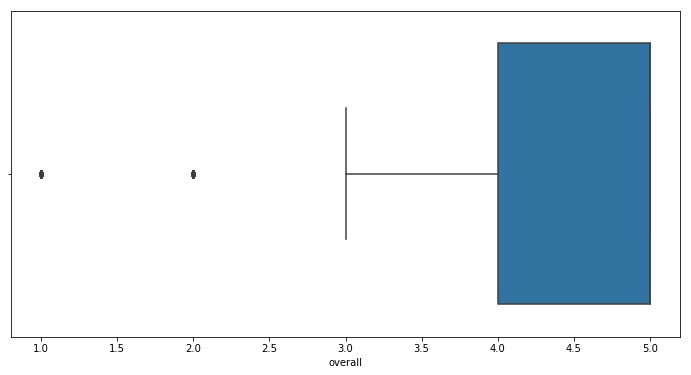

In [11]:
# boxplot for overall score
plt.figure(figsize=(12,6))
sns.boxplot(x='overall',data=df_amazon)
plt.show()

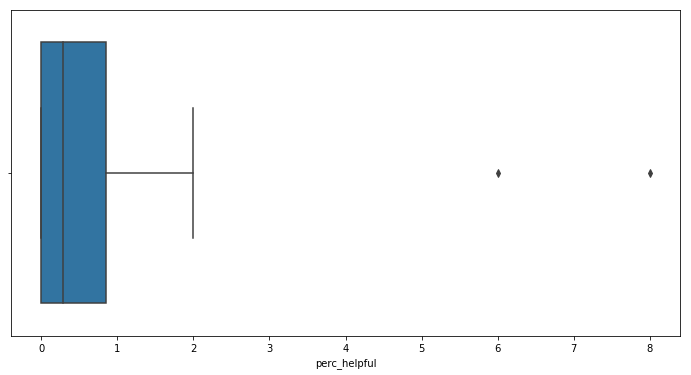

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='perc_helpful',data=df_amazon)
plt.show()

In [13]:
# remove outliers, no category should have a % greater than 1
df_amazon = df_amazon[df_amazon['perc_helpful'] <= 1]

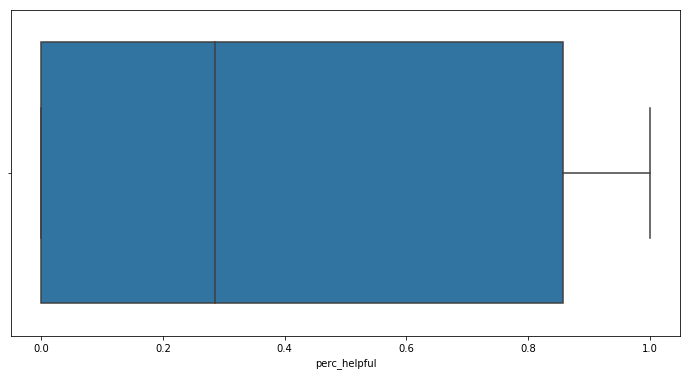

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='perc_helpful',data=df_amazon)
plt.show()

In [15]:
import string
translator = str.maketrans('', '', string.punctuation)
def process_text(t):
    t = t.translate(translator).lower()
    return t

In [16]:
df_amazon['reviewText'] = df_amazon.reviewText.apply(lambda x: process_text(x))
df_amazon['summary'] = df_amazon.summary.apply(lambda x: process_text(x))

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# df_amazon = df_amazon.dropna()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)
X_s = vectorizer.fit_transform(df_amazon.summary)

In [19]:
X_r = vectorizer.fit_transform(df_amazon.reviewText)

In [22]:
import scipy.sparse as sp

In [20]:
X_comb = sp.hstack([X_s, X_r], format='csr')

In [21]:
# concatenate reviewText to summary here with 'X'
Y = df_amazon['overall']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comb,Y,test_size=.3)

In [23]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
y_pred = bnb.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.45      0.41      0.43     31374
          2       0.25      0.28      0.26     30609
          3       0.32      0.22      0.26     60615
          4       0.33      0.26      0.29    114907
          5       0.64      0.74      0.69    271754

avg / total       0.50      0.52      0.51    509259



### Logistic regression

In [26]:
# multinomial logistic regression using % helpful, review time, 
# TFIDF vectorization for log regression
# random forest

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,3))
X_s = vectorizer.fit_transform(df_amazon.summary)

In [19]:
# X_r = list(vectorizer.fit_transform(df_amazon.reviewText))

In [30]:
X_s

<1697527x245924 sparse matrix of type '<class 'numpy.float64'>'
	with 13370619 stored elements in Compressed Sparse Row format>

In [47]:
X_comb = df_amazon[['weekday', 'perc_helpful', 'num_votes']]
X_comb = X_comb.values
X_comb = sp.csr_matrix(X_comb)

In [48]:
X_comb = sp.hstack([X_comb,X_s], format='csr')

In [49]:
Y = df_amazon['overall_5']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comb,Y,test_size=.3)

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=.5)
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [88]:
pred_y = lr.predict(X_test)

f1 = f1_score(y_test,pred_y,average='weighted')
roc = roc_auc_score(y_test,pred_y)

In [89]:
print('f1 score: %.4f' % f1)
print('ROC/AUC score: %.4f' % roc)

f1 score: 0.7407
ROC/AUC score: 0.7376


In [ ]:
# word2vec or LDA (topic modeling)